In [1]:
import pandas as pd
import numpy as np

from autots import AutoTS
from neuralprophet import NeuralProphet

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\Tony\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 지정된 프로시저를 찾을 수 없습니다'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
# encoding = 'CP949'
filename = 'gasoline_price.csv'
data = pd.read_csv(filename)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      5696 non-null   object 
 1   서울      5696 non-null   float64
 2   부산      5696 non-null   float64
 3   대구      5696 non-null   float64
 4   인천      5696 non-null   float64
 5   광주      5696 non-null   float64
 6   대전      5696 non-null   float64
 7   울산      5696 non-null   float64
 8   경기      5696 non-null   float64
 9   강원      5696 non-null   float64
 10  충북      5696 non-null   float64
 11  충남      5696 non-null   float64
 12  전북      5696 non-null   float64
 13  전남      5696 non-null   float64
 14  경북      5696 non-null   float64
 15  경남      5696 non-null   float64
 16  제주      5696 non-null   float64
 17  세종      4020 non-null   float64
dtypes: float64(17), object(1)
memory usage: 801.1+ KB


In [4]:
data.head(3)

구분       서울       부산       대구       인천       광주       대전       울산  \
0  2008년04월15일  1734.58  1670.48  1685.09  1681.13  1681.41  1678.26  1679.84   
1  2008년04월16일  1749.97  1677.34  1690.47  1694.46  1690.59  1689.88  1684.25   
2  2008년04월17일  1744.71  1675.69  1686.59  1689.71  1690.14  1682.45  1683.56   

        경기       강원       충북       충남       전북       전남       경북       경남  \
0  1685.70  1667.75  1666.60  1670.94  1663.01  1677.56  1676.57  1674.62   
1  1699.21  1675.11  1670.79  1678.60  1667.78  1681.05  1683.83  1680.75   
2  1691.94  1676.31  1671.39  1675.84  1665.62  1685.62  1679.24  1679.82   

        제주  세종  
0  1692.05 NaN  
1  1696.70 NaN  
2  1692.67 NaN

## 2. Data Preparation

In [5]:
char_replace = ['년', '월']

for char in char_replace:
    data['구분'] = data['구분'].str.replace(char, '-')

data['구분'] = data['구분'].str.replace('일', '')
#data['구분'] = data['구분'].str[:-1]

data.rename({'구분':'Day'}, axis=1, inplace = True)

data['Date'] = pd.to_datetime(data['Day'], errors='coerce', format='%Y-%m-%d')

data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

data.reset_index(inplace=True)

data = data.drop('Day', axis = 1)

In [6]:
data.head(3)

Date       서울       부산       대구       인천       광주       대전       울산  \
0 2008-04-15  1734.58  1670.48  1685.09  1681.13  1681.41  1678.26  1679.84   
1 2008-04-16  1749.97  1677.34  1690.47  1694.46  1690.59  1689.88  1684.25   
2 2008-04-17  1744.71  1675.69  1686.59  1689.71  1690.14  1682.45  1683.56   

        경기       강원       충북       충남       전북       전남       경북       경남  \
0  1685.70  1667.75  1666.60  1670.94  1663.01  1677.56  1676.57  1674.62   
1  1699.21  1675.11  1670.79  1678.60  1667.78  1681.05  1683.83  1680.75   
2  1691.94  1676.31  1671.39  1675.84  1665.62  1685.62  1679.24  1679.82   

        제주  세종  
0  1692.05 NaN  
1  1696.70 NaN  
2  1692.67 NaN

## 3. EDA

In [7]:
print(data.isnull().sum())

Date       0
서울         0
부산         0
대구         0
인천         0
광주         0
대전         0
울산         0
경기         0
강원         0
충북         0
충남         0
전북         0
전남         0
경북         0
경남         0
제주         0
세종      1676
dtype: int64


In [8]:
data['세종'] = data['세종'].fillna(0)
print(data.isnull().sum())

Date    0
서울      0
부산      0
대구      0
인천      0
광주      0
대전      0
울산      0
경기      0
강원      0
충북      0
충남      0
전북      0
전남      0
경북      0
경남      0
제주      0
세종      0
dtype: int64


In [9]:
fig = px.line(data, x='Date', y='서울', title = 'Gasoline Prices of Seoul by Year',
              labels = {
                  "Date" : "Year",
                  "서울" : "Gasoline Price (won)"
              },
              template = 'plotly_dark')
fig.show()

In [10]:
fig = px.histogram(data, x='서울', 
                   title = 'Gasoline Prices of Seoul',
                   labels = {
                  "서울" : "Gasoline Price (won)"
                   },
                   template = 'plotly_dark')
fig.show()

In [11]:
seoul = data[['Date', '서울']]
seoul.columns = seoul.columns.str.replace('서울', 'Price')

In [12]:
seoul.head(3)

Date    Price
0 2008-04-15  1734.58
1 2008-04-16  1749.97
2 2008-04-17  1744.71

In [13]:
seoul.tail(3)

Date    Price
5693 2023-11-16  1760.22
5694 2023-11-17  1757.69
5695 2023-11-18  1752.40

Text(0.5, 0, 'Date')

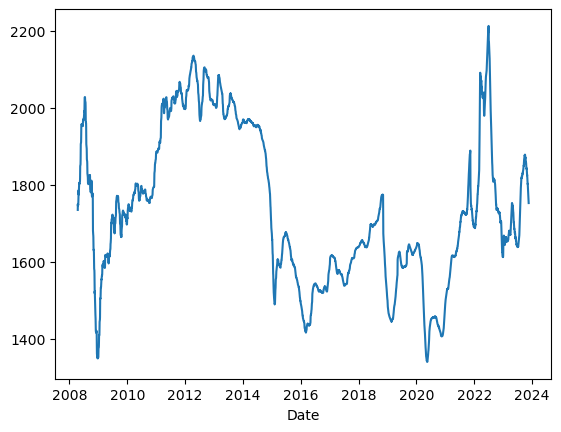

In [14]:
plt.plot(seoul['Date'], seoul.loc[:, seoul.columns != 'Date'])
plt.xlabel("Date")

In [15]:
#dpi = 100
plt.figure(figsize=(15,4))#, dpi=dpi)
plt.plot(seoul['Date'], seoul['Price'], color='tab:red')
plt.xlabel('Date')
plt.ylabel('Price of Gasoline(KRW)')
plt.title('Price of Gasoline in Seoul from 2008 to 2023')
         
plt.show()

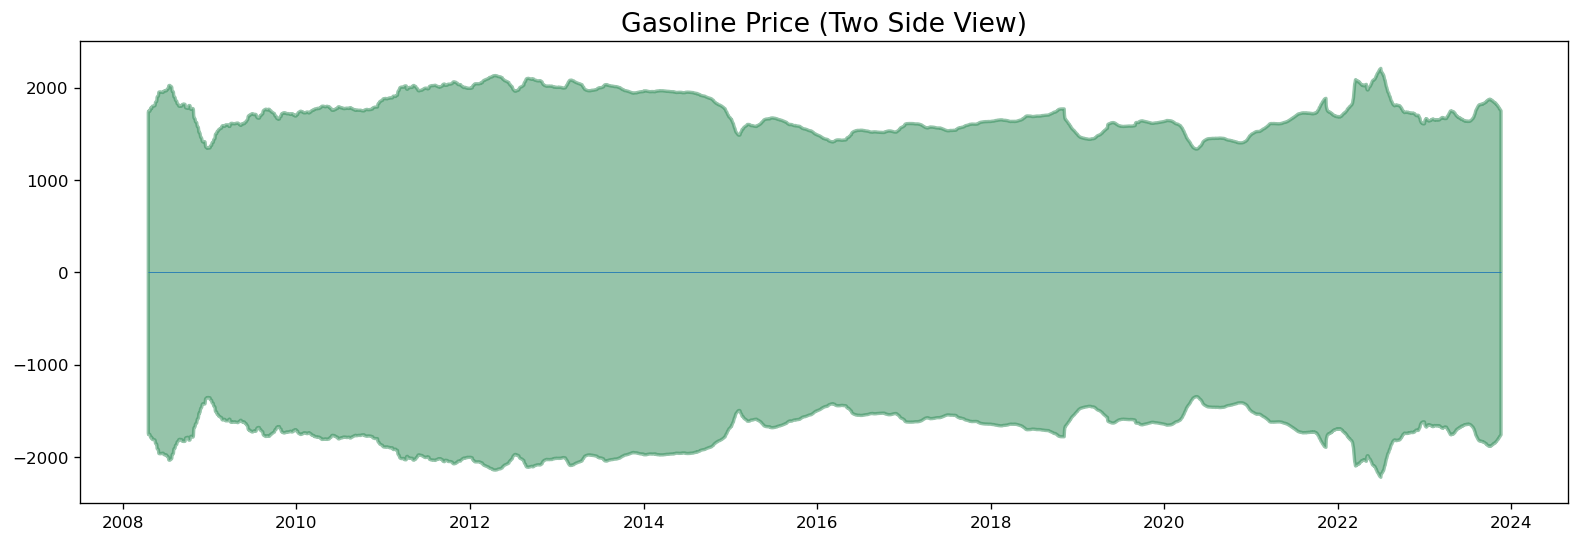

In [16]:
x = seoul['Date'].values
y1 = seoul['Price'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-2500, 2500)
plt.title('Gasoline Price (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(seoul['Date']), xmax=np.max(seoul['Date']), linewidth=.5)
plt.show()

In [17]:
px.line(seoul, x='Date', y='Price')

FigureWidgetResampler({
    'data': [{'hovertemplate': 'Date=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b>  <i style="color:#fc9944">~6D</i>',
              'showlegend': False,
              'type': 'scattergl',
              'uid': 'f934e8ba-6133-471d-8011-8e1b7890ae87',
              'x': array([datetime.datetime(2008, 4, 15, 0, 0),
                          datetime.datetime(2008, 4, 16, 0, 0),
                          datetime.datetime(2008, 4, 21, 0, 0), ...,
                          datetime.datetime(2023, 11, 6, 0, 0),
                          datetime.datetime(2023, 11, 12, 0, 0),
                          datetime.datetime(2023, 11, 18, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([1734.58, 1749.97, 1748.01, ..., 1802.69, 1774

In [18]:
seoul['year'] = seoul['Date'].dt.year
seoul['month'] = seoul['Date'].dt.month
seoul['day'] = seoul['Date'].dt.day

In [19]:
seoul.head(3)

Date    Price  year  month  day
0 2008-04-15  1734.58  2008      4   15
1 2008-04-16  1749.97  2008      4   16
2 2008-04-17  1744.71  2008      4   17

##### Heatmap

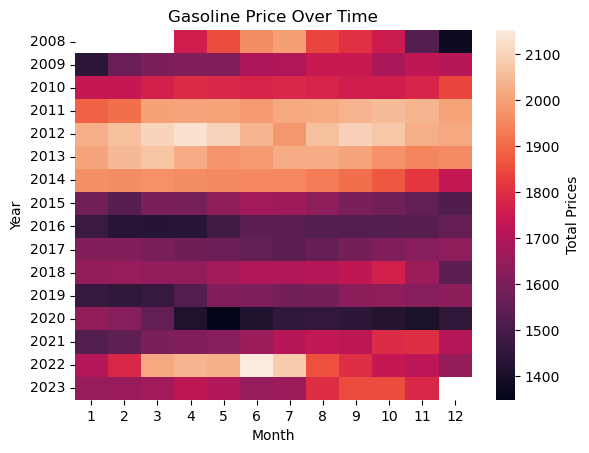

In [20]:
# re-format the data for the heat-map
price_month_year = seoul.pivot_table(index="year", columns="month", values="Price", aggfunc='mean')

# create heatmap
sns.heatmap(price_month_year, cbar_kws={"label": "Total Prices"})
plt.title("Gasoline Price Over Time")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

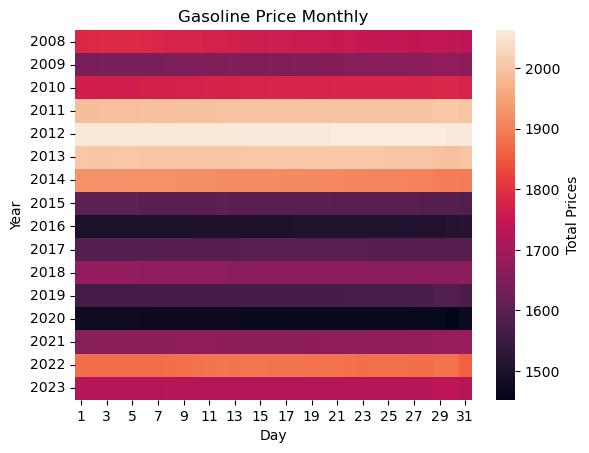

In [21]:
# re-format the data for the heat-map
price_month_day = seoul.pivot_table(index="year", columns="day", values="Price", aggfunc='mean')

# create heatmap
sns.heatmap(price_month_day, cbar_kws={"label": "Total Prices"})
plt.title("Gasoline Price Monthly")
plt.xlabel("Day")
plt.ylabel("Year")
plt.show()

연도별 가격이 어느 정도였는지 대략 알 수 있다.

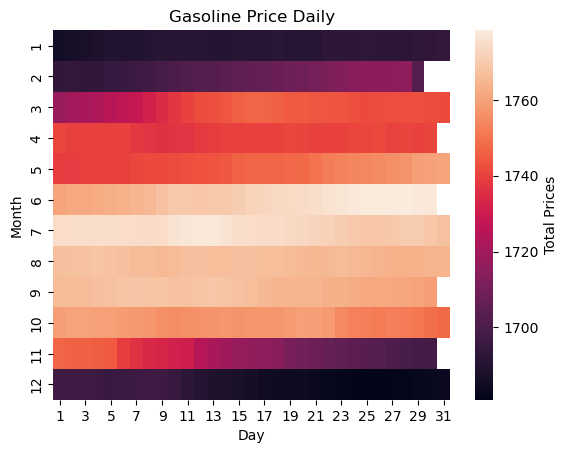

In [22]:
# re-format the data for the heat-map
price_month_day = seoul.pivot_table(index="month", columns="day", values="Price", aggfunc='mean')

# create heatmap
sns.heatmap(price_month_day, cbar_kws={"label": "Total Prices"})
plt.title("Gasoline Price Daily")
plt.xlabel("Day")
plt.ylabel("Month")
plt.show()

겨울에는 비교적 가격이 하락하고 여름과 가을에 가격이 상승하는 경향을 볼 수 있다.

##### Lag scatter plot

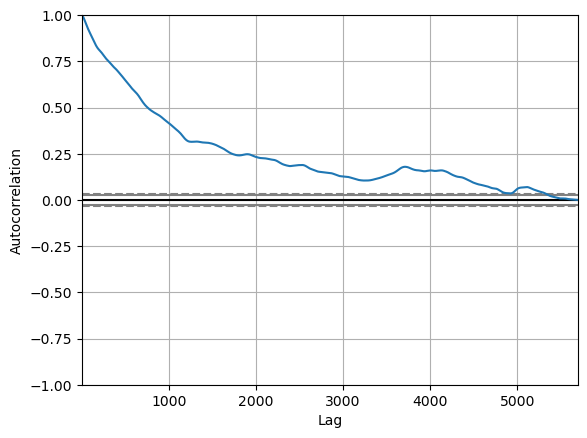

In [23]:
# import autocorrelation function
from pandas.plotting import autocorrelation_plot

year_seoul = seoul[['year', 'Price']]

# autocorrelation plot
autocorrelation_plot(year_seoul)
plt.show()

## Decomposition of a Time Series

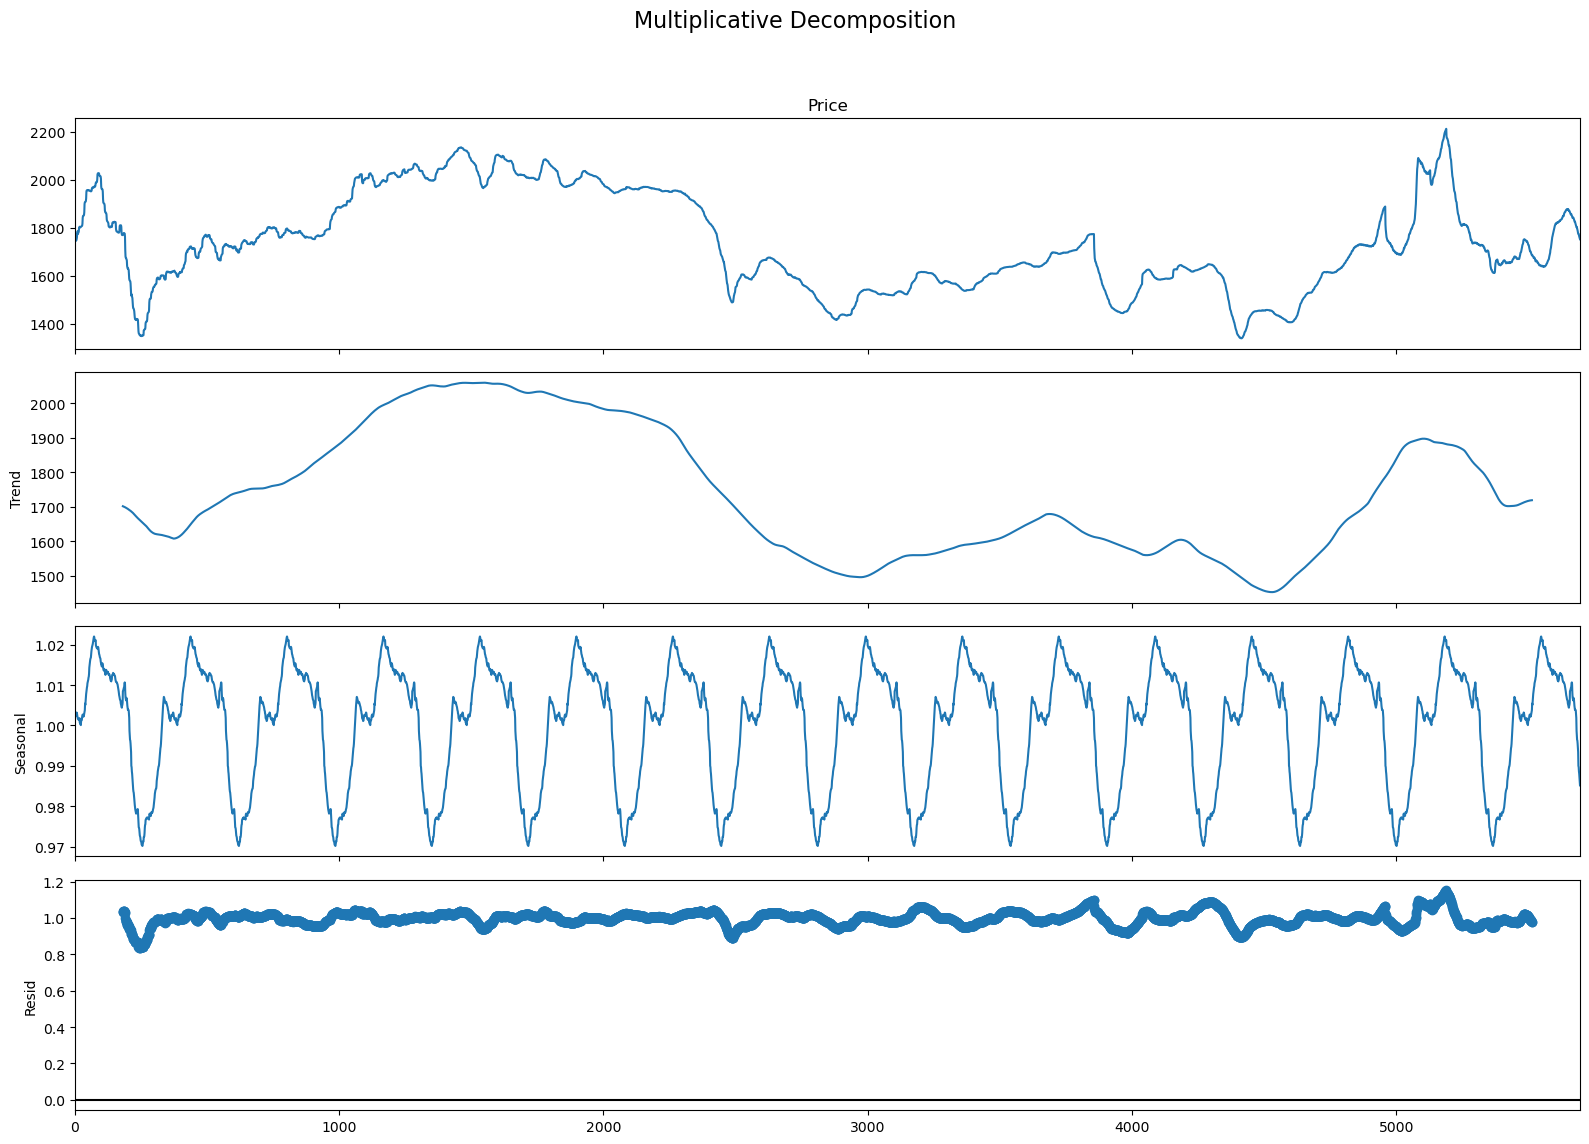

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(seoul['Price'], model='multiplicative', period=365)

# Additive Decomposition
additive_decomposition = seasonal_decompose(seoul['Price'], model='additive', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

print('ADF TEST 결과')
adf_test(seoul['Price'])

ADF TEST 결과
ADF Statistics: -2.807326
p-value: 0.057235
num of lags: 22.000000
num of observations: 5673.000000
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


P value is 0.0572, which is greater than 0.05.
<br>
Thus, It is not significant, which means the data is $Non-Stationary$.
<br>
Although I doubt that this value means significant.

## Stationary and Non-Stationary Time Series

In [26]:
seoul.head(3)

Date    Price  year  month  day
0 2008-04-15  1734.58  2008      4   15
1 2008-04-16  1749.97  2008      4   16
2 2008-04-17  1744.71  2008      4   17

In [27]:
seoul.columns

Index(['Date', 'Price', 'year', 'month', 'day'], dtype='object')

In [28]:
new_seoul = seoul[['Date', "Price"]]
new_seoul.set_index("Date", inplace=True)

In [29]:
new_seoul.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5696 entries, 2008-04-15 to 2023-11-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5696 non-null   float64
dtypes: float64(1)
memory usage: 89.0 KB


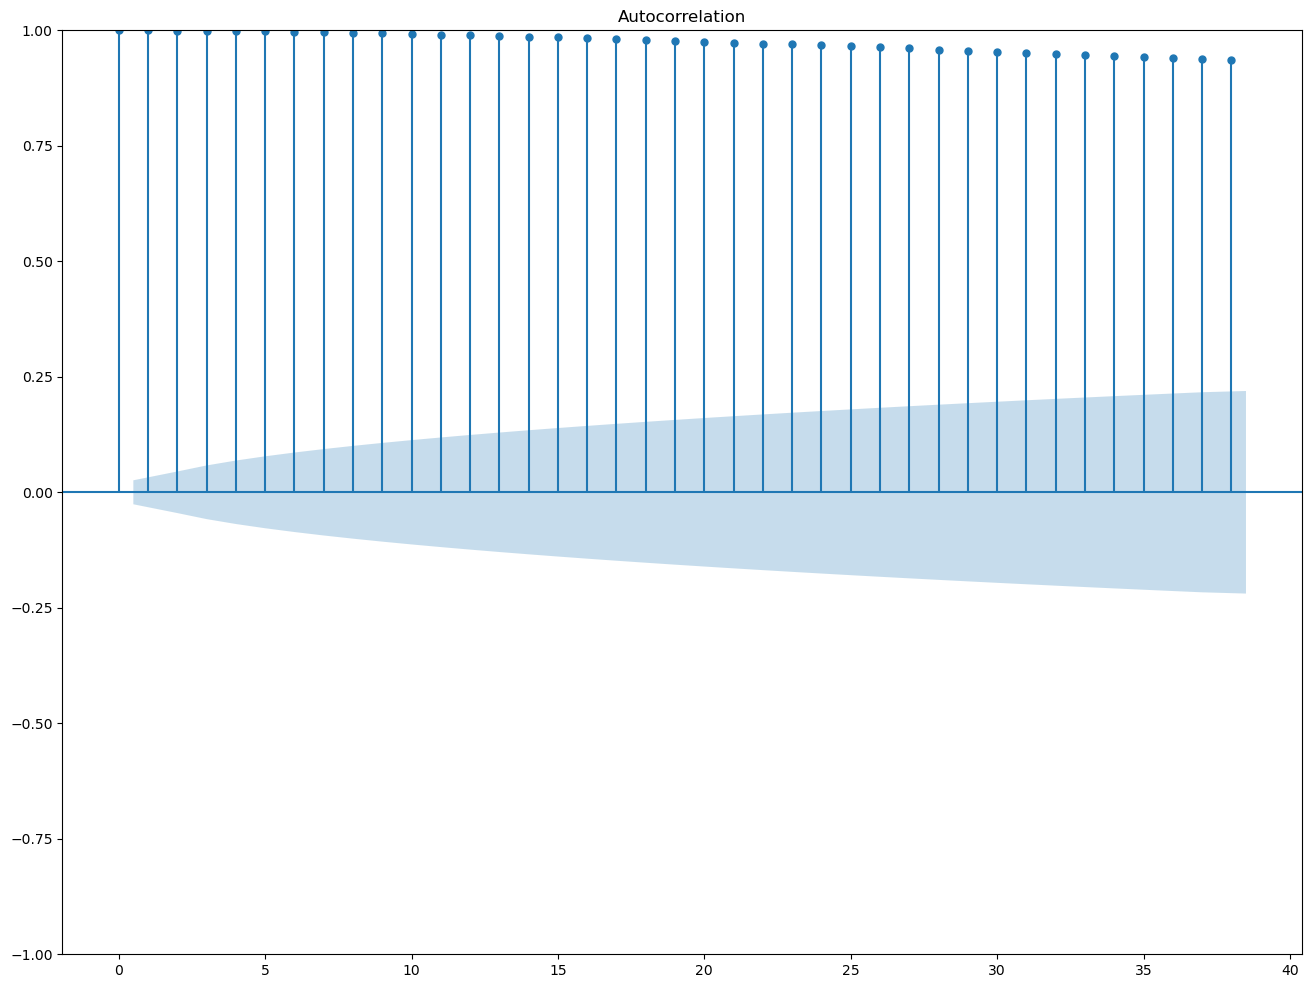

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(new_seoul)
plot_pacf(new_seoul)
plt.show()

ACF plot가 천천히 감소되는 것으로 보아 주식 데이터는 주기에 따라 일정하지 않은 비정상성 데이터이고,
<br>
PACF plot에서 첫값으로부터 1개 이후 파란 박스에 들어가면서 그래프가 끊기는 것으로 보아 AR(1) 모델을 활용하는 것이 가장 적절할 것으로 예상된다.

## NeuralProphet

In [45]:
neural = new_seoul.reset_index(drop=False)
neural.columns = neural.columns.str.replace("Date", 'ds')
neural.columns = neural.columns.str.replace("Price", 'y')

In [46]:
neural

ds        y
0    2008-04-15  1734.58
1    2008-04-16  1749.97
2    2008-04-17  1744.71
3    2008-04-18  1748.01
4    2008-04-19  1748.87
...         ...      ...
5691 2023-11-14  1768.84
5692 2023-11-15  1764.10
5693 2023-11-16  1760.22
5694 2023-11-17  1757.69
5695 2023-11-18  1752.40

[5696 rows x 2 columns]

In [47]:
m = NeuralProphet()

m.set_plotting_backend("plotly")  # show plots correctly in jupyter notebooks

metrics = m.fit(neural)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.982% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 119
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (178) is too small than the required number for the learning rate finder (244). The results might not be optimal.
Missing logger folder: C:\Users\Tony\Desktop\2023 학부\오픈소스프로그래밍\OSP_team6_team-project\lightning_logs


Finding best initial lr:   0%|          | 0/244 [00:00<?, ?it/s]

FailedPreconditionError: C:\Users\Tony\Desktop\2023 학부\오픈소스프로그래밍\OSP_team6_team-project\lightning_logs is not a directory

## pmdarima(auto_arima)

In [31]:
import pmdarima as pm
from pmdarima.arima import ndiffs
data = new_seoul
n_diffs = ndiffs(data, alpha=0.05, test='adf', max_d=6)
print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [ ]:
model = pm.auto_arima(
    y=new_seoul,
    d=1,
    m=4, seasonal=True, # 계절성이 없음
    stepwise=True,
    trace=True
)

Best model:  ARIMA(2,1,1)(0,0,0)[0]
<br>
Total fit time: 25.291 seconds
- without seasonal

Best model:  ARIMA(2,1,1)(0,0,0)[4]
<br>
Total fit time: 68.478 seconds
- with seasonal(m=4)

Best model:  ARIMA(3,1,3)(2,0,0)[12]
<br>
Total fit time: 1065.697 seconds
- with seasonal (m=12)

In [ ]:
print(model.summary())

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

- 1. 잔차의 정상성
Standardized residual(좌상단) : 잔차의 시계열 데이터. 
잔차의 시계열이 평균 0을 중심으로 변동하는 것으로 보임.
<br>
Correlogram (우하단) : 잔차에 대한 ACF 플롯. 어느정도 허용 범위(파란박스) 안에 <br>
위치하여 자기상관이 없음을 알 수 있음.
<br>
- 2. 잔차의 정규성
Histogram plus estimated density (우상단) : 잔차의 히스토그램을 그려 
<br>
정규분포 (N(0,1))와 밀도를 추정한 그래프.
<br>
Normal Q-Q (좌하단) : 양끝쪽 빨간 선을 벗어나는 구간이 존재한다. 
<br>
정규성을 만족하려면 빨간 일직선 위에 점들이 분포해야 함.

## AIRMA Model

In [ ]:
# train : test = 9 : 1
train_data, test_data = new_seoul[:int(len(data)*0.63)], new_seoul[int(len(data)*0.63):]

In [ ]:
train_data.head(3)

In [ ]:
train_data.info

In [ ]:
test_data.head(3)

In [ ]:
test_data.info

#### Learning

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model_fit = pm.auto_arima(
    y=train_data,
    d=n_diffs, 
    start_p=1, start_q=1, start_P=1, start_Q=1,
    max_p=5, max_q=5, max_P=5, max_Q=5, 
    D=10, max_D=10,
    seasonal=False,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
# Create predictions for the future, evaluate on test
preds, conf_int = model_fit.predict(n_periods=test_data.shape[0], return_conf_int=True)

print(model_fit.summary())

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test_data, preds)))

In [ ]:
x_axis = np.arange(train_data.shape[0] + preds.shape[0])
x_years = x_axis + 2008  # Year starts at 2008

plt.plot(x_years[x_axis[:train_data.shape[0]]], train_data, alpha=0.75)
plt.plot(x_years[x_axis[train_data.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train_data.shape[0]:]], test_data,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Lynx forecasts")
plt.xlabel("Year")

In [ ]:
model_fit.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
x = np.arange(test_data.shape[0])
plt.scatter(x, test_data, marker='x')
plt.plot(x, model_fit.predict(n_periods=test_data.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_xlim(0,40)
ax.plot(train_data, "ro-", linewidth=2, markersize=12)
ax.plot(list(range(30,35)), model_fit.forecast(steps_to_predict), "bo-", linewidth=2, markersize=12)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = list()
history = [x for x in train_data]

for t in range(len(test_data)):
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
sarima = model_fit.fit()

In [ ]:
# forecast 함수
def forecast_n_step(model, n = 1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )

def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

In [ ]:
# Forecast 
fc, upper, lower = forecast(len(test_data), model_fit, test_data.index, data = test_data)

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower, index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper, index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='train_data')
plt.plot(test_data, c='b', label='test_data (actual price)')
plt.plot(fc, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: ' ,'{:.2f}%'.format(mape*100))
"""  
결과
모델의 오차율 계산(성능평가)
MSE:  4.423699884665538e+128
MAE:  4.1226648119126564e+63
RMSE:  2.103259347932522e+64
MAPE:  11709.69%
"""

## 4. Initialize Model
I wil forecast Price directly.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_kantor = StandardScaler()
scaler_echannel = StandardScaler()
new_seoul = scaler_kantor.fit_transform(new_seoul)

In [ ]:
# Add time-series models here
model_list = ['ARIMA', 'FBProphet']
model = ['ARIMA', 'FBProphet']

In [ ]:
mod_kantor = AutoTS(
    forecast_length=365,
    frequency='infer',
    prediction_interval=0.9,
    ensemble='all',
    model_list=model,
    max_generations=5,
    num_validations=2,
    validation_method='even',
    n_jobs = -1
)

mod_echannel = AutoTS(
    forecast_length=365,
    frequency='infer',
    prediction_interval=0.9,
    ensemble='all',
    model_list=model_list,
    max_generations=5,
    num_validations=2,
    validation_method='even',
    n_jobs=-1
)

In [ ]:
# Output is hidden
mod_kantor = mod_kantor.fit(seoul,
                            date_col='Date', 
                            value_col='Price', 
                            id_col=None)

mod_echannel = mod_echannel.fit(seoul,
                                date_col='Date', 
                                value_col='Price', 
                                id_col=None)

In [ ]:
print(mod_kantor)

In [ ]:
print(mod_echannel)

In [ ]:
prediction_kantor = mod_kantor.predict()
forecast_kantor = prediction_kantor.forecast
plt.plot(forecast_kantor);

In [ ]:
prediction_echannel = mod_echannel.predict()
forecast_echannel = prediction_echannel.forecast
plt.plot(forecast_echannel);